# Ames Housing Data Analysis


In [2]:
# Import packages

import pandas as pd # Pandas is a package for data manipulation 
import numpy as np  # Numerical Python (NumPy) is a package for dealing with calculations in an efficent and fast way. 
import matplotlib.pyplot as plt #Package for plotting
import seaborn as sns
import statsmodels.formula.api as smf # statistical modelling package with R-like formulas

In [3]:
# Data Load 
ames_data = pd.read_csv(r"C:\Users\ASUS\Documents\3 - Portfolio\Python_Project\data\ames.csv")



## Description

A short analysis project aiming to highlight all of the things I have learned about data science in python over several completed courses. This project will go over: 

- Exploratory Data Analysis 
- Data Visualisation 
- Statistical Analysis 
- Prediciton Using Machine Learning

To do this, I will be using the Ames Housing data, which contains  various features and attributes of residential homes in Ames, Iowa, USA. The central variable of this analysis project is the sale price of individual properties. As outlined, I will conduct exploratory data analysis to try and understand key trends in the data, visualise variables that highlight particular patterns, test for differences using a classic statistical approach, and finally try to model sale prices to determine; what are the best predictors of sale price and what model can most accurately predict the price of a house. 



## Exploratory Data Analysis

To understand what kind of variables we have, lets first have a look at the columns and how the data looks like. 

### Column Name Cleaning 

Right now, if we were to preview the column names, they would not be in a consistent and tidy format that is friendly to work with. Lets see first what it looks like: 

In [4]:
print(ames_data.columns)

Index(['Order', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garag

some of them have spaces between two words, some dont. Lets make sure the format across is easy to read and work with by defining a function that will : 

- change all of the letters to lower case
- replace the space with an underscore

In [5]:
# Cleaning Column Names

#  What if we turned this into a function that did this all automatically. 

def clean_col_names(data): 

    """ Returns a dataset with cleaned column names. For each column in ames_data.columns, change them all to lower case and replace space with underscore """

    data.columns = [column.lower() for column in ames_data.columns]
    data.columns = [column.replace(" ", "_") for column in ames_data.columns] 

    return data


In [6]:
# lets apply function to our data and see if it has worked correctly

cleaned_ames_data = clean_col_names(ames_data)

cleaned_ames_data.columns

Index(['order', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'garag

looking much better! Now lets select the variables that we actually want to work with for our analysis:

In [7]:
ames_data.info() # The info function returns the columns, 
                 # The number of non-empty values, and the data type, which is particularly useful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order            2930 non-null   int64  
 1   ms_subclass      2930 non-null   int64  
 2   ms_zoning        2930 non-null   object 
 3   lot_frontage     2440 non-null   float64
 4   lot_area         2930 non-null   int64  
 5   street           2930 non-null   object 
 6   alley            198 non-null    object 
 7   lot_shape        2930 non-null   object 
 8   land_contour     2930 non-null   object 
 9   utilities        2930 non-null   object 
 10  lot_config       2930 non-null   object 
 11  land_slope       2930 non-null   object 
 12  neighborhood     2930 non-null   object 
 13  condition_1      2930 non-null   object 
 14  condition_2      2930 non-null   object 
 15  bldg_type        2930 non-null   object 
 16  house_style      2930 non-null   object 
 17  overall_qual  

### NA values 

One of the first things worth looking at is whether the data has a high amount of NA values. 

In [8]:
print(cleaned_ames_data.isna().sum()) # isna method returns missing value and sum() totals the amount over each column

order               0
ms_subclass         0
ms_zoning           0
lot_frontage      490
lot_area            0
                 ... 
mo_sold             0
yr_sold             0
sale_type           0
sale_condition      0
saleprice           0
Length: 81, dtype: int64


Some variables, such as lot_frontage have a large amount of missing values. Is this because the values are truly missing, or is it because there is no frontage lot to report on. 

In [9]:
cleaned_ames_data.columns

cleaned_ames_data[["lot_frontage"]]

,lot_frontage
0,141.0
1,80.0
2,81.0
3,93.0
4,74.0
...,...
2925,37.0
2926,NaN
2927,62.0
2928,77.0


In this dataset, it is due to lack of frontage area to report on, however, in other datasets, this might not be known. So it would be worth deducting this from other variables, such as lot area, to see whether its a true NA or a missing value

In [10]:

lot_frontage_NA = cleaned_ames_data[cleaned_ames_data["lot_frontage"].isna() & cleaned_ames_data["lot_area"]]

lot_frontage_NA[["lot_frontage", "lot_area"]]

,lot_frontage,lot_area
23,NaN,11241
24,NaN,12537
55,NaN,7851
58,NaN,9505
79,NaN,9453
...,...,...
2859,NaN,11435
2871,NaN,16381
2892,NaN,8239
2894,NaN,16669


By filtering the dataset to only show NA values for lot frontage, we can see that all rows still have a lot area, indicating that those with NA values on frontage ghave no frontage to report on. 

### Visualising Distributions


Lets pick out the key variable we are interested "Sale Price", and find out a bit more about it.

In [11]:
cleaned_ames_data["saleprice"].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: saleprice, dtype: float64

The .describe() method gives us some surface level details about the sale price of properties in this dataset. We can see that there are in total 2930 properties, each one has a sale price (no NA values). 

- The mean house price was $180,796
- The median house price was $160,000

Slight discrepancy between the two measure of dispersion suggesting that the mean is slightly skewed by higher priced properties. Best way to investigate this is by visualising the data

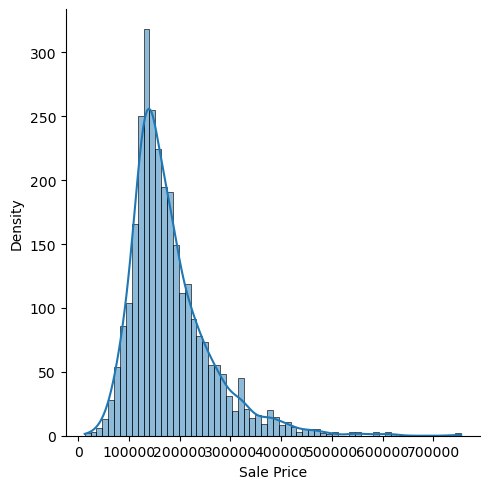

In [12]:

sale_price_counts = sns.displot(x = cleaned_ames_data["saleprice"],
                                kde = True)

                                  
sale_price_counts.set(xlabel='Sale Price',
                        ylabel='Density');

sale_price_counts;

And this indeed seems to be true, to distribution of sale price indicates a slight positive skew. With the left-hand tail rising much steeper and rapidly compared to the right-hand tail. We can also easly determine this using a simle function and place a number on how 'skewed' sale price is.

In [13]:
cleaned_ames_data["saleprice"].skew()

1.7435000757376466

Adding another variable to the mix, one of the most intuative factors that might affect the price of a house is the neighbourghood in which it is located. Lets have a look at all the possible neighbourhoods. Next, lets look at how sale price is distributed based on neighbourhood

In [14]:
cleaned_ames_data["neighborhood"].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

Based on the number of unique neighbourhoods, a histogram plot would not be able to show us in detail what is going on. 

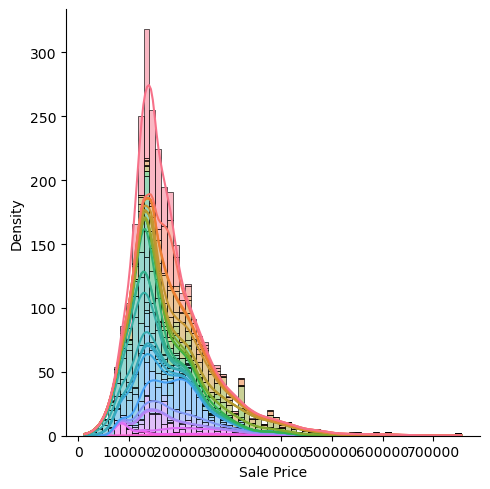

In [15]:
#TODO: Format Graph

sale_price_counts_neighbourhood = sns.displot(x = cleaned_ames_data["saleprice"],
                                hue= cleaned_ames_data["neighborhood"],
                                multiple = "stack", 
                                kde = True, 
                                legend=False)

                                  
sale_price_counts_neighbourhood.set(xlabel='Sale Price',
                        ylabel='Density');

sale_price_counts;

A better way to visualise this might be boxplots

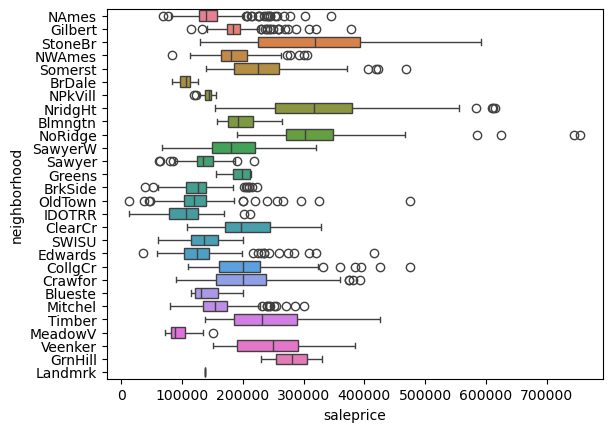

In [16]:
#TODO: Format Graph

saleprice_neighbourhood_boxplot = sns.boxplot(x = cleaned_ames_data["saleprice"], 
                                              y = cleaned_ames_data["neighborhood"], 
                                              hue = cleaned_ames_data["neighborhood"])

#TODO: format graph: add title, make bigger
#TODO: what can be derived from this graph 

- which neighbourhoods have low IQR (low variance in price)
- which neighbourhoods have high IQR (high variance)
- which neighbourhoods have outliers 
- which neighbourhoods sell for higher/lower prices

Clearly, sale price is dependent on the neighbourhood. But its unlikely to be the only variable that predicts sale price. Establishing this for categorical numbers is difficult, but for numeric ones it is slightly easier. We can calculate the correlation of a all numeric variables in this dataset to the 'saleprice' variable, to establish potential predictors. This could also be visualised in a correlation matrix. 

In [17]:
numeric_columns = cleaned_ames_data.select_dtypes(include=['number']).columns

# Calculate the correlation of numeric columns with "Neighbourhood"
correlation_with_saleprice = cleaned_ames_data[numeric_columns].corrwith(df['saleprice']).sort_values(ascending=True)

correlation_with_saleprice = correlation_with_saleprice[:-1] # the last value of this row would have been the correlation of saleprice with saleprice

print(correlation_with_saleprice)

NameError: name 'df' is not defined

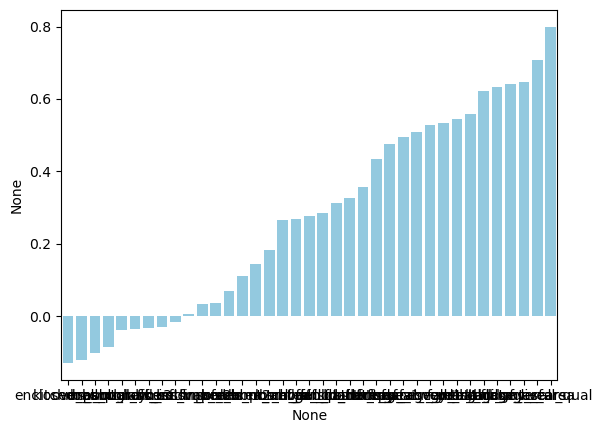

In [ ]:
#TODO: format graph

# Create a bar plot to visualize correlations

correlation_with_saleprice_plot = sns.barplot(x=correlation_with_saleprice.index, y=correlation_with_saleprice, color='skyblue')


## Statistical Analysis

The next step is to identify which variables could be predictors for our outcome variable: sale price. We could pick a few out based on intuition, such as the lot area a.k.a how much land does the property on sale contain. 

<AxesSubplot: xlabel='lot_area', ylabel='saleprice'>

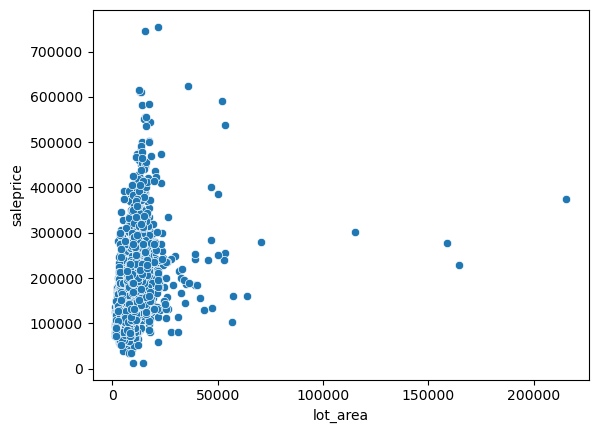

In [ ]:
# TODO: Give this the good treatment

sns.scatterplot(data = cleaned_ames_data, y = "saleprice", x = "lot_area")

Intuatively it would have been a safe assumption to think that the 'lot area' would influence the sale price, and while there are some huge lots that sell for high amounts, there does not seem to be much of a straight forward correlation. We can quantify the effect of lot area on the sale price by fitting a linear model. 

In [ ]:
linear_model = smf.ols(formula = "saleprice ~ lot_area", data = cleaned_ames_data)

model_results = linear_model.fit()

print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     223.9
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           7.63e-49
Time:                        20:01:47   Log-Likelihood:                -37124.
No. Observations:                2930   AIC:                         7.425e+04
Df Residuals:                    2928   BIC:                         7.426e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.534e+05   2319.909     66.112      0.0

From the graph, we knew lot area has not been a good indicator of sale price. But now with the model summary, we can put some numbers to how bad it is. 

**TODO** Go over the model output in detail and extract as much detail out of it as possible: 

* - From the adjusted R-squared, we can see that our model explained 7% of variance in sale price, which is not a lot at all 
* - Despite this, lot area is a significant predictor of sale price (p < 0.001). For every 2.7 m^2 of lot area, sale price increases by 1

The model fit is poor, and we can improve it drastically. The first step is checking whether there are better predictors of sale price than lot area. We can do this by creating a correlation matrix of all variables, and seeing which ones are the most correlated with our outcome. However, if we do this right now, we could not visualise very clearly due to the number of variables in this dataset. So firstly, we have to select which variables we want to work with, 

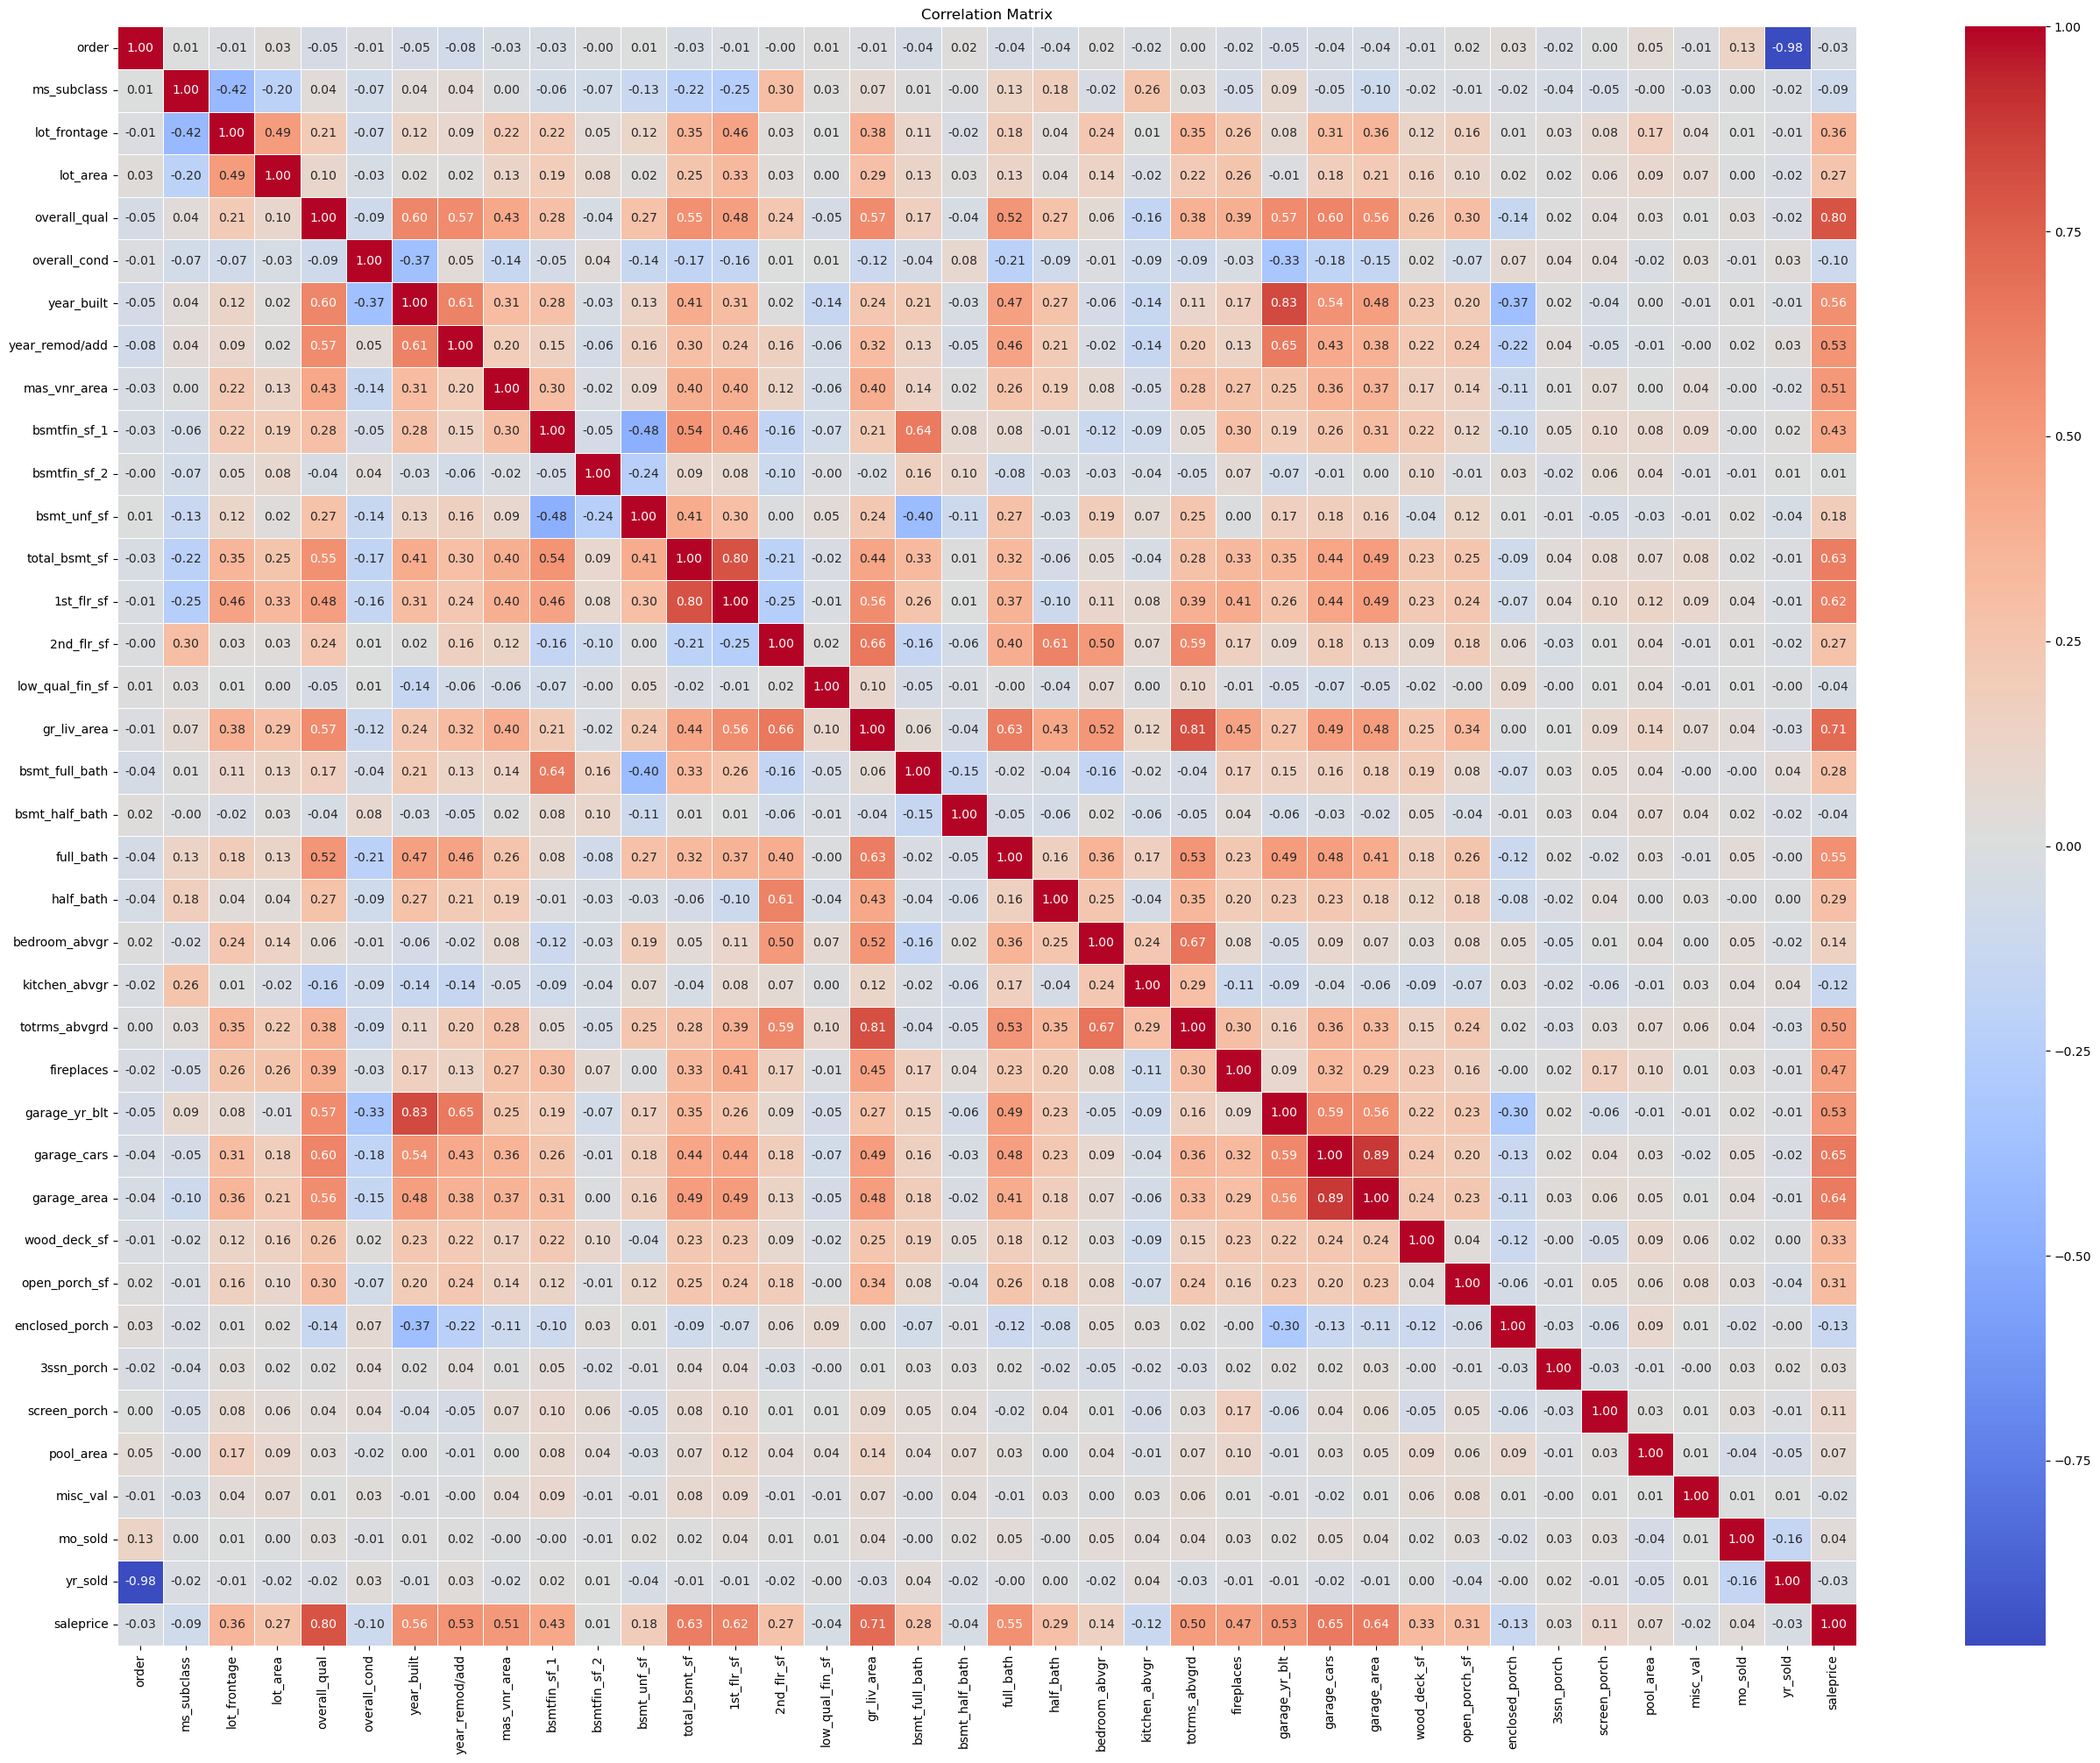

In [21]:
# TODO: Ammend the heatmap so that it is legible
# Calculate the correlation matrix

df = pd.DataFrame(cleaned_ames_data)
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_columns]

correlation_matrix = numeric_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(32, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Lots of variables in our dataset means lots of correlations. The heatmap lets us extract visualise some of those relationshops and look at some patterns. 

## Prediction With Machine Learning